#Import Library

In [28]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix

#Train-Test Datasets

##Download dan Transform Dataset

In [29]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

##Load Dataset

In [30]:
train_dl = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle = True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle = False)

In [31]:
for images, labels in train_dl:
  print(images.shape, labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


##Visualize Data

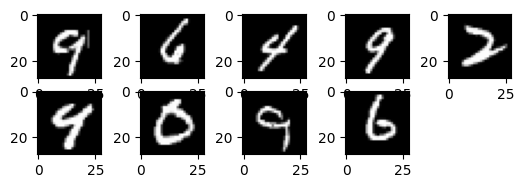

In [32]:
figure = plt.figure()
for i in range (1, 10):
  plt.subplot(5,5,i)
  plt.imshow(images[i].numpy().squeeze(), cmap="gray")

#Neural Network Model = MLP

In [51]:
class Mlp(nn.Module):
  def __init__(self):
    super(Mlp, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)

    return x

#LOSS 1

In [52]:
model = Mlp()
los = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 3
epochs = tqdm(range(num_epochs))

for epoch in epochs:
  train_loss = []
  model.train()
  for batch in (train_dl):
    optimizer.zero_grad()
    images = batch[0].reshape(-1, 28*28)
    label = batch[1]

    output = model(images)
    loss = torch.nn.CrossEntropyLoss()(output.squeeze(-1), label)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  loss_now = np.mean(train_loss)
  epochs.set_postfix({'loss': loss_now})

predlist = torch.zeros(0, dtype=torch.long)
lbllist = torch.zeros(0, dtype=torch.long)

with torch.no_grad():
  for ims, labels in test_dl:
    ims = ims.reshape(-1, 28*28)
    labels = labels
    outputs = model(ims)
    _, predicted = torch.max(outputs.data, 1)

    predlist = torch.cat([predlist, predicted.view(-1).cpu()])
    lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

#confusion matrix
conf_mat = confusion_matrix(np.asarray(lbllist), np.asarray(predlist))
print(conf_mat)

#per-class accuracy
class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

#report
print(classification_report(np.asarray(lbllist), np.asarray(predlist), digits=3))

  0%|          | 0/3 [00:00<?, ?it/s]

[[ 962    0    1    2    1    2    4    3    4    1]
 [   0 1125    2    2    0    1    2    0    3    0]
 [   3    2  999    7    3    0    2    9    7    0]
 [   0    1    2  994    0    4    0    5    2    2]
 [   0    0    1    0  955    0    4    2    1   19]
 [   2    1    0   15    2  862    4    1    3    2]
 [   6    3    2    1   10    5  925    0    6    0]
 [   0   11   10    9    1    1    0  987    1    8]
 [   3    0    1   17    3    6    2    4  936    2]
 [   4    6    0   14   11    3    0    5    3  963]]
[98.16326531 99.11894273 96.80232558 98.41584158 97.25050916 96.6367713
 96.55532359 96.01167315 96.09856263 95.44103072]
              precision    recall  f1-score   support

           0      0.982     0.982     0.982       980
           1      0.979     0.991     0.985      1135
           2      0.981     0.968     0.975      1032
           3      0.937     0.984     0.960      1010
           4      0.969     0.973     0.971       982
           5      0.97

#LOSS 2

In [53]:
model = Mlp()
los = nn.MultiMarginLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 3
epochs = tqdm(range(num_epochs))

for epoch in epochs:
  train_loss = []
  model.train()
  for batch in (train_dl):
    optimizer.zero_grad()
    images = batch[0].reshape(-1, 28*28)
    label = batch[1]

    output = model(images)
    loss = torch.nn.MultiMarginLoss()(output.squeeze(-1), label)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  loss_now = np.mean(train_loss)
  epochs.set_postfix({'loss': loss_now})

predlist = torch.zeros(0, dtype=torch.long)
lbllist = torch.zeros(0, dtype=torch.long)

with torch.no_grad():
  for ims, labels in test_dl:
    ims = ims.reshape(-1, 28*28)
    labels = labels
    outputs = model(ims)
    _, predicted = torch.max(outputs.data, 1)

    predlist = torch.cat([predlist, predicted.view(-1).cpu()])
    lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

#confusion matrix
conf_mat = confusion_matrix(np.asarray(lbllist), np.asarray(predlist))
print(conf_mat)

#per-class accuracy
class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

#report
print(classification_report(np.asarray(lbllist), np.asarray(predlist), digits=3))

  0%|          | 0/3 [00:00<?, ?it/s]

[[ 965    0    2    3    0    3    3    3    1    0]
 [   0 1122    2    1    0    1    4    5    0    0]
 [   2    2 1004   10    2    0    0    9    3    0]
 [   0    0    1  986    0    9    0   10    3    1]
 [   0    0    5    0  952    1    9    4    2    9]
 [   3    1    1   12    2  862    6    0    4    1]
 [   6    4    3    1    2    9  931    1    1    0]
 [   1    1    7    3    1    0    0 1012    0    3]
 [   3    1    5   23    4   12    4   19  901    2]
 [   2    6    0   11   16    7    1   30    2  934]]
[98.46938776 98.85462555 97.28682171 97.62376238 96.94501018 96.6367713
 97.18162839 98.44357977 92.50513347 92.56689792]
              precision    recall  f1-score   support

           0      0.983     0.985     0.984       980
           1      0.987     0.989     0.988      1135
           2      0.975     0.973     0.974      1032
           3      0.939     0.976     0.957      1010
           4      0.972     0.969     0.971       982
           5      0.95

#LOSS 3

In [54]:
model = Mlp()
los = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 3
epochs = tqdm(range(num_epochs))

for epoch in epochs:
  train_loss = []
  model.train()
  for batch in (train_dl):
    optimizer.zero_grad()
    images = batch[0].reshape(-1, 28*28)
    label = batch[1]

    output = model(images)
    loss = torch.nn.NLLLoss()(output.squeeze(-1), label)

    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

  loss_now = np.mean(train_loss)
  epochs.set_postfix({'loss': loss_now})

predlist = torch.zeros(0, dtype=torch.long)
lbllist = torch.zeros(0, dtype=torch.long)

with torch.no_grad():
  for ims, labels in test_dl:
    ims = ims.reshape(-1, 28*28)
    labels = labels
    outputs = model(ims)
    _, predicted = torch.max(outputs.data, 1)

    predlist = torch.cat([predlist, predicted.view(-1).cpu()])
    lbllist = torch.cat([lbllist, labels.view(-1).cpu()])

#confusion matrix
conf_mat = confusion_matrix(np.asarray(lbllist), np.asarray(predlist))
print(conf_mat)

#per-class accuracy
class_accuracy = 100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

#report
print(classification_report(np.asarray(lbllist), np.asarray(predlist), digits=3))

  0%|          | 0/3 [00:00<?, ?it/s]

[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]
[  0. 100.   0.   0.   0.   0.   0.   0.   0.   0.]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       980
           1      0.114     1.000     0.204      1135
           2      0.000     0.000     0.000      1032
           3      0.000     0.000     0.000      1010
           4      0.000     0.000     0.000       982
           5      0.000     0.000     0.000       892
           6      0.000     0.000     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Describe

Dalam ketiga loss function diatas, loss function yang dapat memaksimalkan akurasi adalah Cross Entropy Loss. Dengan nilai akurasi sebesar 97%. Sedangkan loss function yang paling buruk digunakan dalam mesin tersebut adalah, NLL Loss yang mana menyebabkan loss data paling besar dan menghasilkan nilai akurasi sebesar 11% saja.